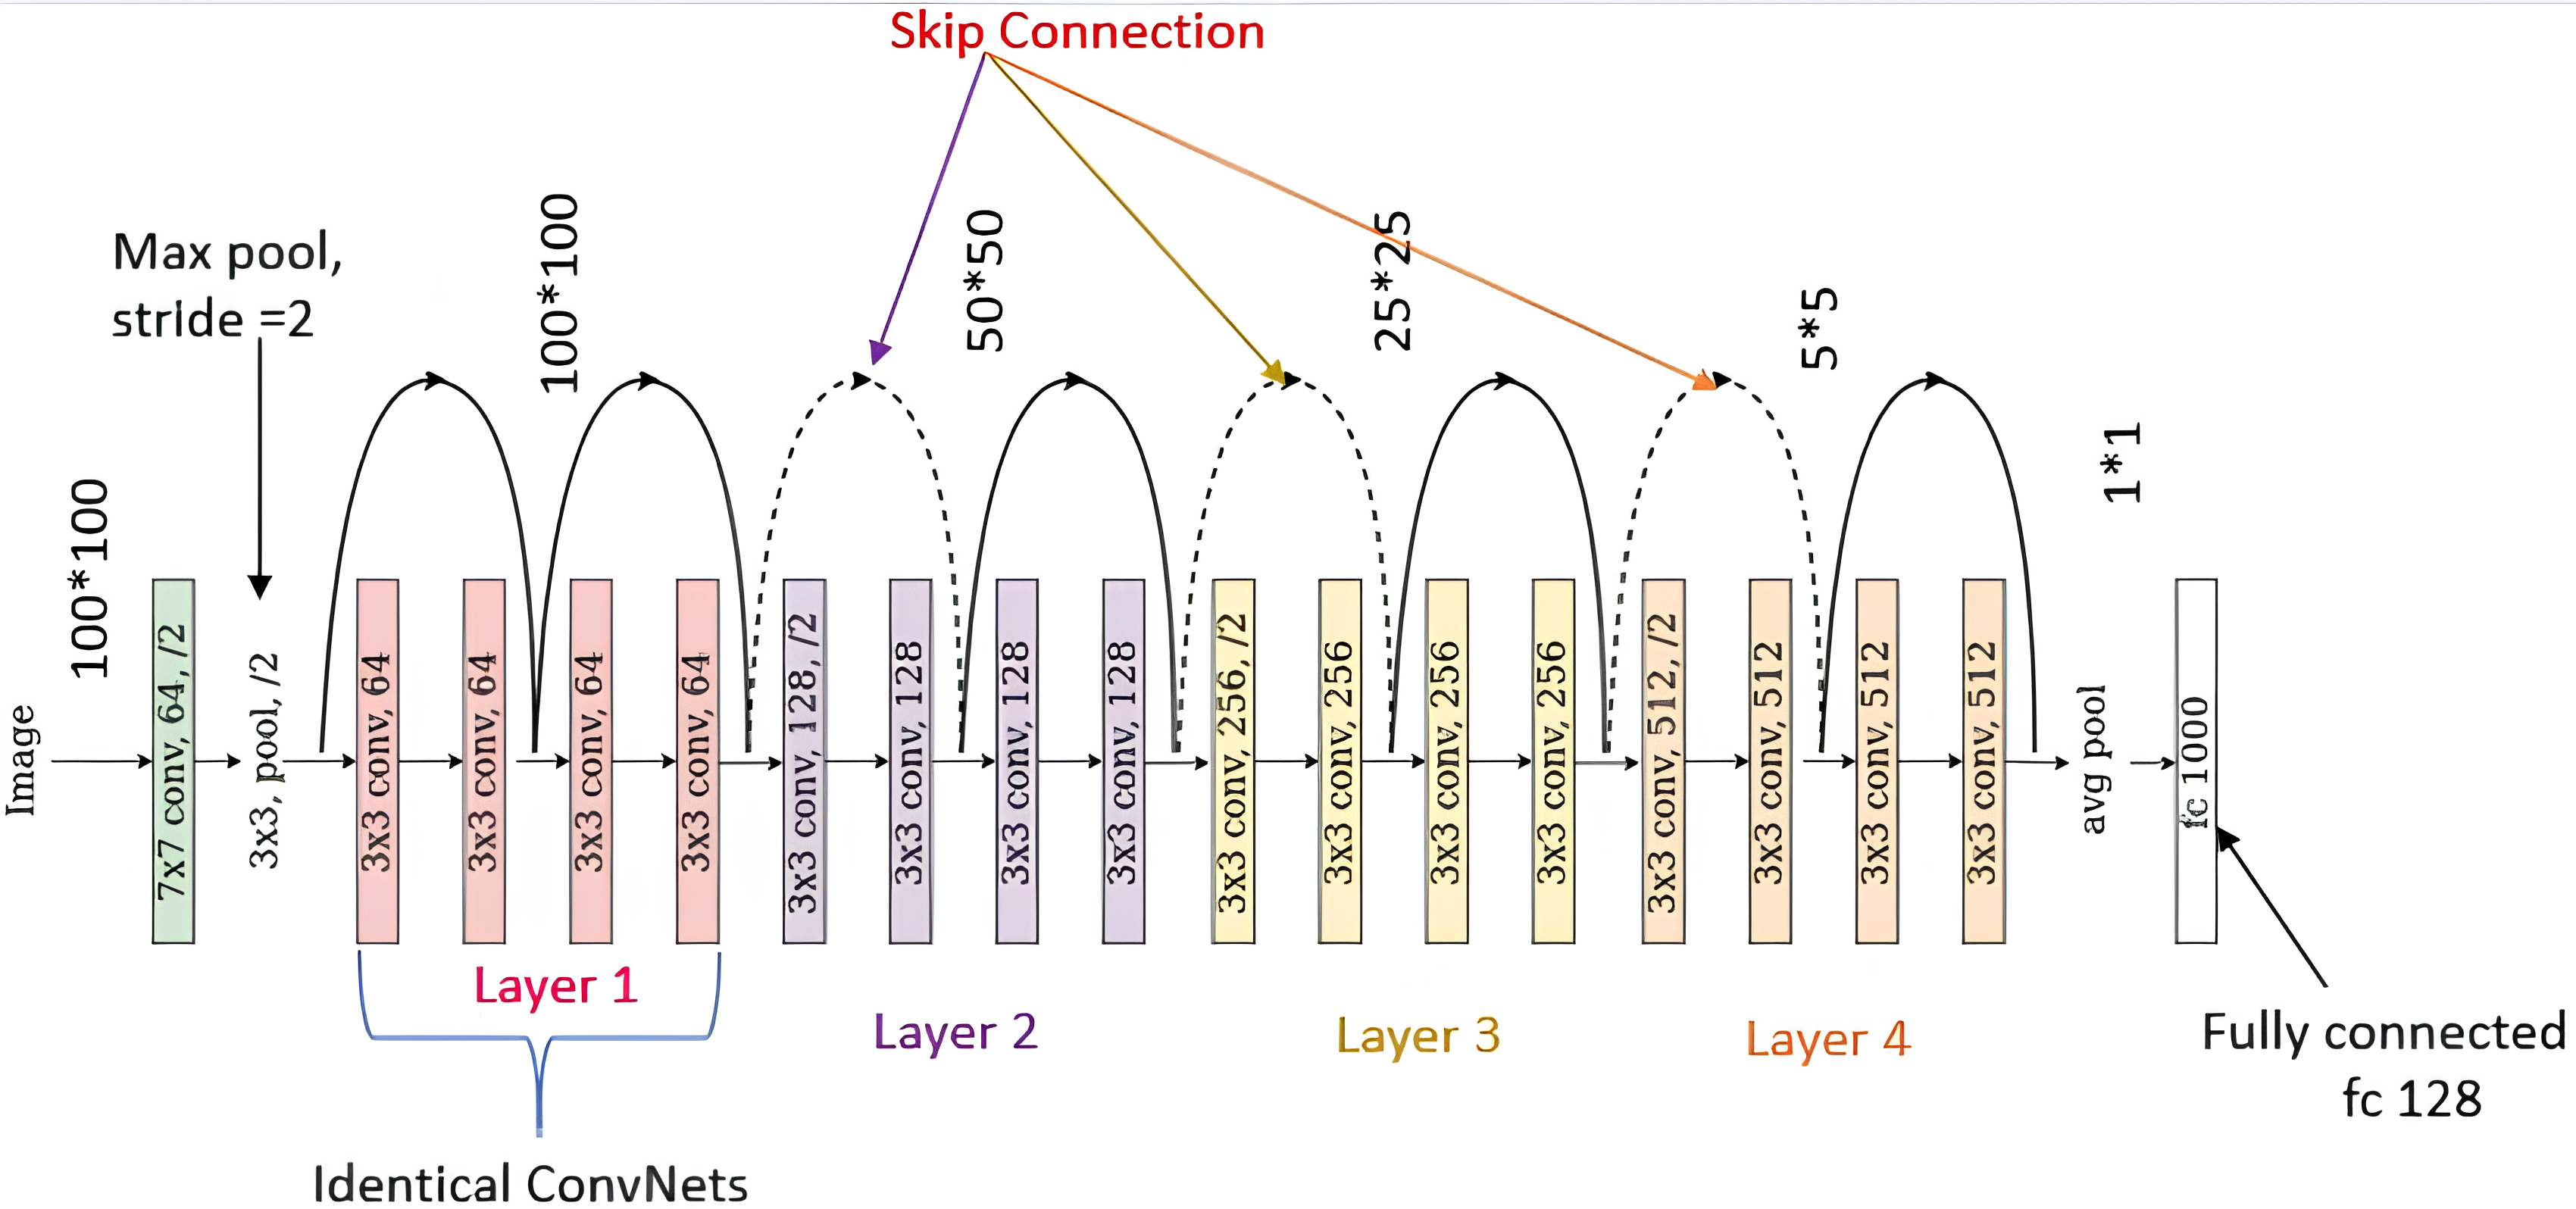

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alifrahman/covid19-chest-xray-image-dataset")

print("Path to dataset files:", path)

c:\Users\KGaurav\AppData\Local\miniforge3\envs\gk\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 40.6M/40.6M [00:09<00:00, 4.28MB/s]

Extracting files...


Path to dataset files: C:\Users\KGaurav\.cache\kagglehub\datasets\alifrahman\covid19-chest-xray-image-dataset\versions\1


(1989, 1482)


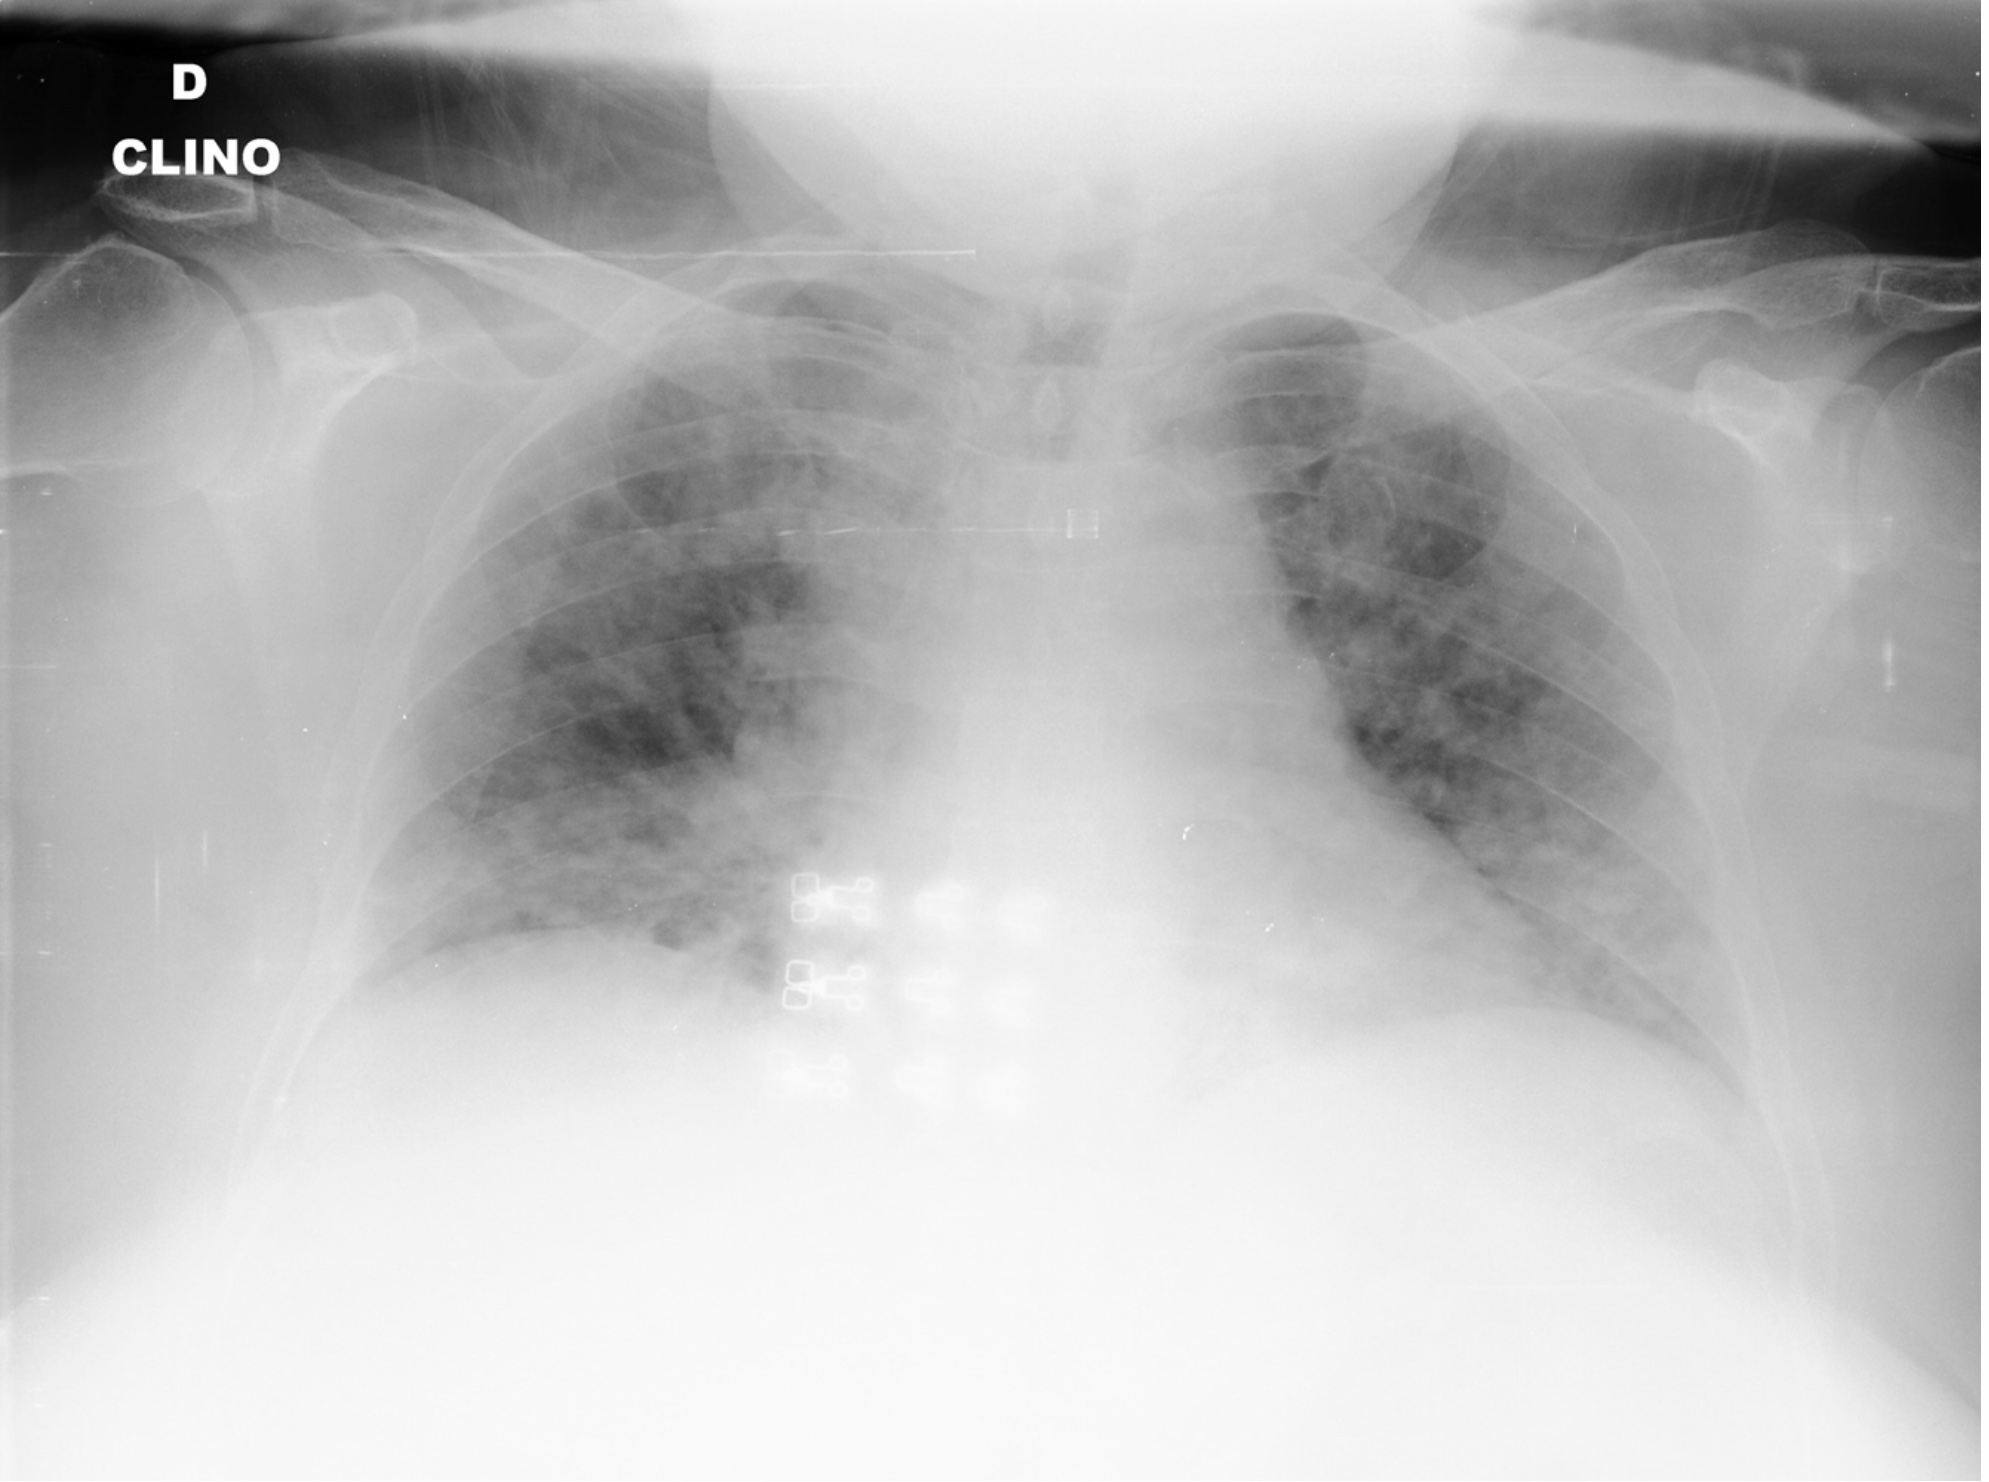

In [15]:
import torch
import os
from PIL import Image

covid_images = path+"/"+"dataset/covid"
image_path = os.listdir(covid_images)[0]
image = Image.open(os.path.join(covid_images, image_path))
print(image.size)
image

In [25]:
from torch.nn import Conv2d
import torchvision.transforms as T

conv = Conv2d(in_channels=3, out_channels=2, kernel_size=7, stride=2, bias=True)

# convert image to tensor
transform = T.ToTensor()
img_tensor = transform(image)
# rearranges the image dimensions from 
# H x W x C (Height x Width x Channels) to C x H x W (Channels x Height x Width), 
# which is the standard format for PyTorch models.
print(img_tensor.shape)

x = conv(img_tensor)
x.shape

torch.Size([3, 1482, 1989])


torch.Size([2, 738, 992])

TypeError: Invalid shape (738, 992, 2) for image data

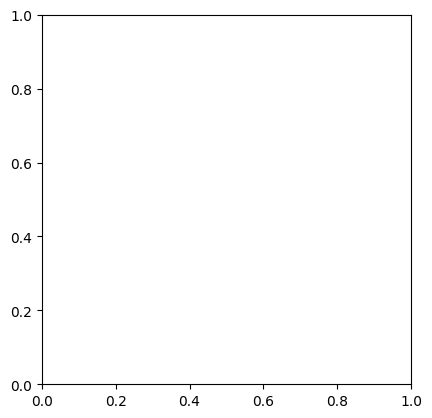

In [29]:
import matplotlib.pyplot as plt
# plt.plot(img_tensor.to('cpu').detach().numpy())
plt.imshow(x.permute(1, 2, 0).to('cpu').detach().numpy())